<a href="https://colab.research.google.com/github/Anvians/Android/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [42]:
from sklearn.datasets import make_circles

In [43]:
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [44]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
len(X_train),  len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

In [48]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

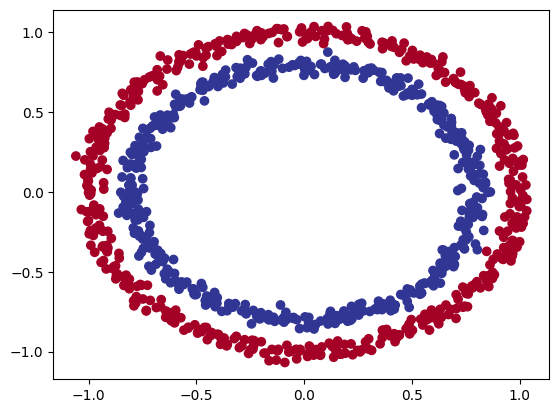

In [49]:
plt.scatter(x= X[:,0],
            y=X[:,1],
            c = y,
            cmap=plt.cm.RdYlBu)

##Creating a Model

In [50]:
class Classification_model(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer1 = nn.Linear(in_features=2, out_features=8)
    self.Layer2 = nn.Linear(in_features=8, out_features=1)

  def forward(self, x):
    return self.Layer2(self.Layer1(x))

model = Classification_model().to(device)
model

Classification_model(
  (Layer1): Linear(in_features=2, out_features=8, bias=True)
  (Layer2): Linear(in_features=8, out_features=1, bias=True)
)

**Without** Training i want to pass the data

In [51]:
untrained_test = model(X_test.to(device))

In [52]:
untrained_test[:5], y_test[:5]

(tensor([[-0.3104],
         [-0.4788],
         [ 0.1177],
         [-0.4316],
         [ 0.0967]], device='cuda:0', grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1.]))

In [53]:
y_sig = torch.sigmoid(untrained_test)
y_sig[:5]

tensor([[0.4230],
        [0.3825],
        [0.5294],
        [0.3937],
        [0.5242]], device='cuda:0', grad_fn=<SliceBackward0>)

In [54]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr = 0.01)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_sig(tensor.detach().numpy()))
ac = accuracy_score(y_test, y_test)
cm
ac
#

NameError: name 'tensor' is not defined

###Training

In [56]:
torch.manual_seed(42)
epochs = 1000

for epoc in range(epochs):
  model.train()
  y_logits = model(X_train.to(device)).squeeze()
  y_pred = torch.sigmoid(y_logits)

  train_loss = loss_fn(y_logits, y_train.to(device))

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  model.eval()

  with torch.inference_mode():
    test_logits = model(X_test.to(device)).squeeze()
    test_pred = torch.sigmoid(test_logits)
    test_loss = loss_fn(test_logits, y_test.to(device))
  if epoc % 10 == 0:
    print(f"Epocs : {epoc} | train_loss : {train_loss} | test_loss : {test_loss}")

Epocs : 0 | train_loss : 0.7054367065429688 | test_loss : 0.6948918104171753
Epocs : 10 | train_loss : 0.7048197984695435 | test_loss : 0.694431722164154
Epocs : 20 | train_loss : 0.704250156879425 | test_loss : 0.6940186619758606
Epocs : 30 | train_loss : 0.7037228941917419 | test_loss : 0.6936476230621338
Epocs : 40 | train_loss : 0.7032339572906494 | test_loss : 0.6933140158653259
Epocs : 50 | train_loss : 0.7027795314788818 | test_loss : 0.6930142045021057
Epocs : 60 | train_loss : 0.7023563981056213 | test_loss : 0.6927446126937866
Epocs : 70 | train_loss : 0.7019615769386292 | test_loss : 0.6925021409988403
Epocs : 80 | train_loss : 0.7015923857688904 | test_loss : 0.6922840476036072
Epocs : 90 | train_loss : 0.7012465000152588 | test_loss : 0.6920880079269409
Epocs : 100 | train_loss : 0.7009217739105225 | test_loss : 0.6919115781784058
Epocs : 110 | train_loss : 0.7006165385246277 | test_loss : 0.6917532086372375
Epocs : 120 | train_loss : 0.7003288865089417 | test_loss : 0.691

In [57]:
import requests
from pathlib import Path

In [58]:
if Path('plot_fn.py').is_file():
  print('plot_fn.py exists')
else:
  print('file is downloading')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('plot_fn.py', 'wb') as f:
    f.write(request.content)

from plot_fn import plot_predictions, plot_decision_boundary

plot_fn.py exists


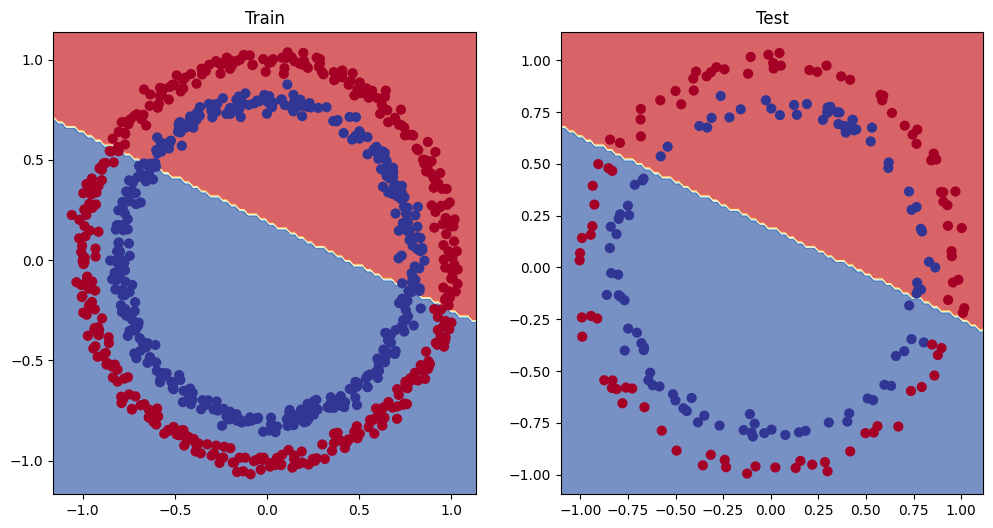

In [59]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

##Model 2

In [79]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=100),
    nn.ReLU(),

    nn.Linear(in_features=100, out_features=1)
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=1, bias=True)
)

In [80]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [81]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [85]:
torch.manual_seed(42)
epochs = 1000

for epoc in range(epochs):
  model_1.train()

  y_logits = model_1(X_train.to(device)).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  train_loss = loss_fn(y_logits, y_train.to(device))
  train_acc = accuracy_fn(y_true=y_train.to(device), y_pred=y_pred.to(device))
  #Optimizer
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  #Test
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test.to(device)).squeeze()
    y_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test.to(device))
    test_acc = accuracy_fn(y_true=y_test.to(device), y_pred=y_pred.to(device))

  if epoc %100==0:
    print(f"Epoch: {epoc} | Train Loss: {train_loss} |  Train_acc: {train_acc} |Test Loss: {test_loss} | test_acc : {test_acc}" )


Epoch: 0 | Train Loss: 0.029266349971294403 |  Train_acc: 100.0 |Test Loss: 0.05067852884531021 | test_acc : 100.0
Epoch: 100 | Train Loss: 0.02349277399480343 |  Train_acc: 100.0 |Test Loss: 0.043066635727882385 | test_acc : 100.0
Epoch: 200 | Train Loss: 0.019482964649796486 |  Train_acc: 100.0 |Test Loss: 0.03752930089831352 | test_acc : 100.0
Epoch: 300 | Train Loss: 0.0165692251175642 |  Train_acc: 100.0 |Test Loss: 0.03334636241197586 | test_acc : 100.0
Epoch: 400 | Train Loss: 0.014367560856044292 |  Train_acc: 100.0 |Test Loss: 0.030086642131209373 | test_acc : 100.0
Epoch: 500 | Train Loss: 0.012650256045162678 |  Train_acc: 100.0 |Test Loss: 0.02749623917043209 | test_acc : 100.0
Epoch: 600 | Train Loss: 0.011277592740952969 |  Train_acc: 100.0 |Test Loss: 0.025369100272655487 | test_acc : 100.0
Epoch: 700 | Train Loss: 0.010160326957702637 |  Train_acc: 100.0 |Test Loss: 0.023617472499608994 | test_acc : 100.0
Epoch: 800 | Train Loss: 0.009233390912413597 |  Train_acc: 100.0

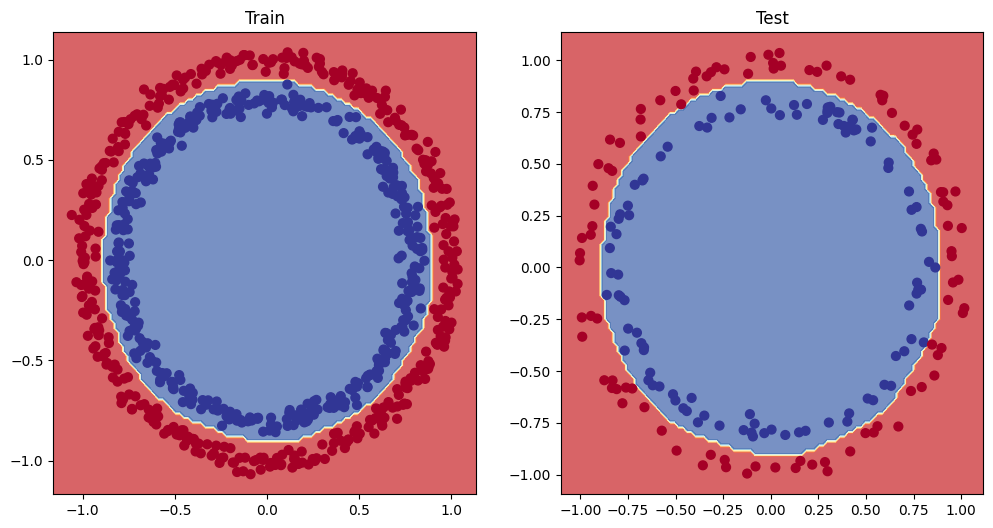

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)